Bude zlobit "právní".

In [1]:
import os
import json
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
import re

In [3]:
herectvo = pd.read_json(os.path.join("data", "herectvo.json"))

In [4]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [5]:
df = pd.read_json(os.path.join("data", "filmy.json"))
df["Hlavní role"] = df["Hrají"].dropna().apply(lambda x: x[:3])
df["Vedlejší role"] = df["Hrají"].dropna().apply(lambda x: x[3:])
df = df.explode("Hrají")

## Obecná data

In [6]:
len(herectvo["Jméno"].drop_duplicates().to_list())

12115

In [7]:
zijici = herectvo[(~herectvo["Datum narození"].isnull()) & herectvo["Datum úmrtí"].isnull()]["Jméno"].drop_duplicates().to_list()

In [8]:
len(zijici)

2979

In [9]:
veskere_herectvo = df["Hrají"].drop_duplicates().to_list()

In [10]:
len(veskere_herectvo)

38332

In [11]:
obsazovanost = pd.Series(herectvo.groupby("Jméno")["Film"].nunique(), name="Obsazovanost")

In [12]:
obsazovanost.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     3.0
0.750     4.0
0.900    14.0
0.950    30.0
0.990    73.0
Name: Obsazovanost, dtype: float64

In [13]:
obsazovanost2 = pd.Series(df.groupby("Hrají")["Film"].nunique(), name="Obsazovanost 2")

In [14]:
obsazovanost2.quantile([0.25,0.333,0.5,0.667,0.75,0.9,0.95,0.99])

0.250     1.0
0.333     1.0
0.500     1.0
0.667     1.0
0.750     1.0
0.900     4.0
0.950     8.0
0.990    40.0
Name: Obsazovanost 2, dtype: float64

In [15]:
q = obsazovanost2.quantile(0.95)
q

8.0

In [16]:
q2 = obsazovanost2.quantile(0.98)
q2

23.0

## Nejdelší a nejplodnější kariéry

In [17]:
hraji = df[["Film","Copyright","Hrají"]].explode("Hrají")

In [18]:
hraji = hraji.merge(persony, left_on="Hrají", right_on="Jméno", how="outer")

In [19]:
hraji = hraji[hraji["Osoba"] != "právni"]

In [20]:
hraji

,Film,Copyright,Hrají,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,Polední výstřel na Mariánských hradbách (401709),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cvičení s kužely Sokolů malostranských (401704),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cyklisté (401705),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Defilování vojska o Božím těle na Královských ...,1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hanácké banderium (401707),1898.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139548,NaN,NaN,NaN,Alexandra Sasínová (9996),9996,,fyzická,None,None,None,None,None,None,None,None,None,None,NaN,NaN
139549,NaN,NaN,NaN,plutoon s. r. o. (99962),99962,None,právní,plutoon,None,None,None,None,None,None,None,None,None,NaN,NaN
139550,NaN,NaN,NaN,plutoon s. r. o. (99962),99962,None,právní,plutoon,None,None,None,None,None,None,None,None,None,NaN,NaN
139551,NaN,NaN,NaN,Čechomor (person),person,None,právní,None,None,None,None,None,None,None,None,None,None,NaN,NaN


In [21]:
hraji["Věk"] = hraji["Copyright"] - hraji["Rok narození"]

In [22]:
delka_kariery = pd.Series(hraji.groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Karel Dvořák                   82.0
Jiří Klečka                    82.0
neuvedeno                      79.0
Jiřina Bohdalová (2878)        79.0
František Kovářík (126912)     77.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Zita Kabátová (839)            73.0
Name: Délka kariéry, dtype: float64

In [23]:
delka_kariery = pd.Series(hraji[~(hraji["Rok úmrtí"] <= (hraji["Copyright"]) - 1)].groupby("Hrají")["Copyright"].max() - hraji.groupby("Hrají")["Copyright"].min(), name="Délka kariéry")
delka_kariery.sort_values(ascending=False).head(10)

Hrají
Anna Burianová                106.0
Marie Novotná                  88.0
Jiří Klečka                    82.0
Karel Dvořák                   82.0
neuvedeno                      79.0
Jiřina Bohdalová (2878)        79.0
Kühnův dětský sbor (22659)     76.0
Zdenka Procházková (42989)     75.0
Josef Karel                    73.0
Černý                          73.0
Name: Délka kariéry, dtype: float64

In [24]:
hraji.groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan W. Speerger (55928)        281
Theodor Pištěk (37366)         254
Eman Fiala (64088)             214
Jaroslav Marvan (9550)         208
František Filipovský (4735)    181
Alois Dvorský (127491)         169
Milka Balek-Brodská (28799)    166
Oldřich Velen (12725)          166
Josef Kemr (4897)              161
Jaroslav Tomsa (2576)          152
Name: Film, dtype: int64

In [25]:
hraji.groupby(["Hrají","Copyright"])["Film"].nunique().nlargest()

Hrají                    Copyright
Jan W. Speerger (55928)  1937.0       21
Theodor Pištěk (37366)   1937.0       20
                         1938.0       20
Jan W. Speerger (55928)  1938.0       19
Karel Veverka (126788)   1937.0       19
Name: Film, dtype: int64

In [26]:
vsechno_herectvo = df["Hrají"].drop_duplicates().to_list()

In [27]:
nejaktivnejsich500 = hraji.groupby("Copyright")["Film"].nunique().nlargest(500).index.to_list()

In [28]:
nejaktivnejsich500

[2019.0,
 2015.0,
 2018.0,
 1937.0,
 2016.0,
 1964.0,
 2017.0,
 1933.0,
 2013.0,
 2014.0,
 1965.0,
 1963.0,
 1935.0,
 1961.0,
 1938.0,
 2012.0,
 2011.0,
 1936.0,
 1966.0,
 1939.0,
 1959.0,
 2008.0,
 1934.0,
 1978.0,
 2009.0,
 1970.0,
 1969.0,
 1981.0,
 2020.0,
 1968.0,
 1962.0,
 1973.0,
 1974.0,
 1958.0,
 1929.0,
 1960.0,
 1955.0,
 1979.0,
 1982.0,
 1972.0,
 1980.0,
 1987.0,
 2021.0,
 1947.0,
 2010.0,
 1928.0,
 1932.0,
 1977.0,
 1971.0,
 1967.0,
 1989.0,
 1983.0,
 1976.0,
 1984.0,
 1921.0,
 1922.0,
 1957.0,
 1986.0,
 2000.0,
 1956.0,
 1990.0,
 1988.0,
 2002.0,
 1999.0,
 1919.0,
 1975.0,
 2006.0,
 1940.0,
 1926.0,
 1927.0,
 1931.0,
 1948.0,
 1985.0,
 1930.0,
 1952.0,
 1998.0,
 1953.0,
 2007.0,
 1949.0,
 1954.0,
 2004.0,
 1994.0,
 1995.0,
 2003.0,
 1944.0,
 2005.0,
 2001.0,
 1920.0,
 1941.0,
 1946.0,
 1996.0,
 1997.0,
 1942.0,
 1950.0,
 1925.0,
 1992.0,
 1993.0,
 1918.0,
 1898.0,
 1991.0,
 1913.0,
 1943.0,
 1923.0,
 1908.0,
 1951.0,
 1945.0,
 1924.0,
 1911.0,
 1912.0,
 1914.0,
 2022.0,
 

<AxesSubplot:xlabel='Copyright'>

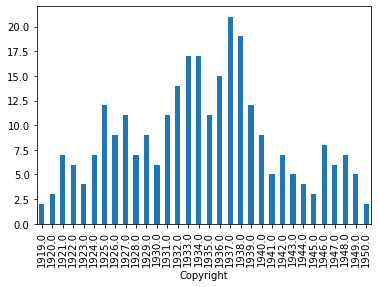

In [29]:
hraji[hraji["Hrají"] == "Jan W. Speerger (55928)"].groupby("Copyright")["Film"].nunique().plot.bar()

In [30]:
hraji[(~hraji["Datum narození"].isnull()) & hraji["Datum úmrtí"].isnull()].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Jan Kuželka (1445)            116
Jiří Lábus (838)              100
Jan Přeučil (4990)             93
Karel Hábl (27177)             92
Jan Kraus (1062)               84
Jiří Krampol (4985)            83
Oldřich Vlach (14387)          78
Jiřina Bohdalová (2878)        76
Jitka Zelenohorská (34821)     74
Ondřej Vetchý (836)            74
Name: Film, dtype: int64

In [31]:
hraji[hraji["Hrají"] == "Jiřina Bohdalová (2878)"][["Copyright","Film","Věk"]].sort_values(by="Copyright").head(10)

,Copyright,Film,Věk
24338,1937.0,Pižla a Žižla na cestách (395752),6.0
24339,1939.0,Zlatý člověk (395859),8.0
24340,1940.0,Babička (395928),9.0
24341,1940.0,Dceruška k pohledání (395926),9.0
24342,1940.0,Madla zpívá Evropě (395922),9.0
24343,1947.0,Muzikant (396045),16.0
24344,1952.0,Únos (396149),21.0
24345,1955.0,Direktiva (396228),24.0
24346,1955.0,Něco se tu změnilo (396202),24.0
24351,1956.0,Vina Vladimíra Olmera (396248),25.0


## Další rekordy

In [32]:
hraji[hraji["Věk"] <= 18].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Salač (126323)        21
Vladimír Bejval (15695)        17
Vladimír Zátka (128952)        16
Filip Renč (558)               15
Josef Kemr (4897)              14
Michael Hofbauer (13613)       14
Josef Filip (127149)           13
Zuzana Ondrouchová (126513)    13
Andrea Čunderlíková (14417)    12
Jan Kraus (1062)               12
Name: Film, dtype: int64

In [33]:
hraji[hraji["Věk"] <= 12].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Vladimír Zátka (128952)    12
Jan Kreidl (128115)        10
Josef Filip (127149)       10
Tomáš Holý (27091)         10
Vladimír Bejval (15695)    10
Dagmar Appelová (28474)     9
Hanuš Bor (7070)            9
Lukáš Bech (23548)          9
Marta Fričová (127372)      9
Michal Koblic (128743)      9
Name: Film, dtype: int64

In [34]:
hraji[hraji["Věk"] >= 67].groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Josef Střecha (55613)        68
Vlastimila Vlková (27109)    55
Alois Dvorský (127491)       47
Josef Oliak (128024)         41
Antonín Soukup (87404)       37
Marie Rosůlková (4751)       36
Vladimír Hlavatý (34999)     36
Josef Příhoda (128694)       35
Bohdan Lachman (128508)      34
Slávka Hamouzová (84688)     34
Name: Film, dtype: int64

## Kolegové

In [35]:
df["Spoluherectvo"] = df["Film"].map(df.groupby("Film")["Hrají"].agg(list))

In [36]:
def kolegove(jmeno):
    kolegove = df[df["Hrají"] == jmeno]["Spoluherectvo"].to_list()
    kolegove2 = [item for kolegove in kolegove for item in kolegove]
    kolegove = []
    for k in kolegove2:
        if k not in kolegove:
            kolegove.append(k)
    return(kolegove)

In [37]:
len(kolegove("Jiřina Bohdalová (2878)"))

1793

In [38]:
spoluherci = {}
for n in nejaktivnejsich500:
    spoluherci[n] = len(kolegove(n))
spoluherci = pd.Series(spoluherci)

In [39]:
spoluherci.sort_values(ascending=False).head(30)

2019.0    0
1998.0    0
1920.0    0
2001.0    0
2005.0    0
1944.0    0
2003.0    0
1995.0    0
1994.0    0
2004.0    0
1954.0    0
1949.0    0
2007.0    0
1953.0    0
1952.0    0
1946.0    0
1930.0    0
1985.0    0
1948.0    0
1931.0    0
1927.0    0
1926.0    0
1940.0    0
2006.0    0
1975.0    0
1919.0    0
1999.0    0
2002.0    0
1941.0    0
1996.0    0
dtype: int64

## Červí díry

In [40]:
prvni = hraji["Copyright"].min()
posledni = [hraji["Copyright"].max(), hraji["Copyright"].max()-1]

In [41]:
prvni_herectvo = hraji[hraji["Copyright"] == prvni]["Hrají"].drop_duplicates().to_list()
prvni_herectvo

[None,
 'Josef Šváb-Malostranský (55291)',
 'Ferdinand Gýra (60351)',
 'Marie Kříženecká (99776)']

In [42]:
posledni_herectvo = hraji[hraji["Copyright"].isin(posledni)]["Hrají"].drop_duplicates().to_list()
posledni_herectvo

[None,
 'Marie Novotná',
 'Jan Kačer (1165)',
 'Iva Janžurová (1049)',
 'Pavel Nový (510)',
 'Zdeněk Dušek (993)',
 'Jiří Navrátil',
 'Jan Martínek',
 'Petr Štěpánek (5406)',
 'Miroslav Vladyka (513)',
 'Václav Černý',
 'Taťjana Medvecká (7064)',
 'Boleslav Polívka (1556)',
 'Luděk Sobota (15687)',
 'Roman Skamene (6363)',
 'Ivo Strangmüller (4401)',
 'Daniela Kolářová (1847)',
 'Marie Čápová',
 'Jiří Bartoška (827)',
 'Jan Kuželka (1445)',
 'Václav Vydra nejml. (2666)',
 'Josef Lébr',
 'Jiří Lábus (838)',
 'Alois Švehlík (6277)',
 'Zuzana Bydžovská (4683)',
 'Jiří Balvín',
 'Otakar Brousek ml. (2989)',
 'Jan Pospíšil',
 'Milan Šteindler (1572)',
 'František Ringo Čech (11726)',
 'Uršula Kluková (12475)',
 'Vlasta Žehrová (2776)',
 'Rostislav Novák st. (40328)',
 'Tomáš Jirsa',
 'Daniela Vacková (27460)',
 'Tomáš Hanák (198)',
 'Vlastimil Venclík (27245)',
 'Petr Drozda (1502)',
 'Miroslav Donutil (7954)',
 'Pavel Zatloukal (1580)',
 'Vladimír Hauser (12684)',
 'Martin Havelka (28167)'

In [ ]:
cervi_diry = []
cervi_filmy = []
for n in vsechno_herectvo:
    spolu = kolegove(n)
    for x in prvni_herectvo:
        if x in spolu:
            for y in posledni_herectvo:
                if y in spolu:
                    print(f"{n}, {x}, {y}")
                    n_filmy = df[df["Hrají"] == n]["Film"].drop_duplicates().to_list()
                    y_filmy = df[df["Hrají"] == y]["Film"].drop_duplicates().to_list()
                    z_filmy = []
                    for nf in n_filmy:
                        if nf in y_filmy:
                            z_filmy.append(nf)
                            cervi_filmy.append(nf)
                    print(z_filmy)
                    print("***")
                    if n not in cervi_diry:
                        cervi_diry.append(n)

Jarmila Kronbauerová (128121), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
Bedřich Vrbský (83528), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396606)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Jan Kačer (1165)
['Údolí včel (396722)', 'Velká neznámá (396861)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Kuřata na cestách (396497)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Petr Štěpánek (5406)
['Údolí včel (396722)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Taťjana Medvecká (7064)
['„Marečku, podejte mi pero!“ (397112)']
***
František Kovářík (126912), Josef Šváb-Malostranský (55291), Daniela Kolářová (1847)
['Na samotě u lesa (397110)']
***
František Kovářík (126912), 

Zdeněk Štěpánek (87457), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Znamení Raka (396675)']
***
Jan Novák, Josef Šváb-Malostranský (55291), Pavel Nový (510)
['Prodavač humoru (397452)']
***
Jan Novák, Josef Šváb-Malostranský (55291), Miroslav Vladyka (513)
['Prodavač humoru (397452)']
***
Jan Novák, Josef Šváb-Malostranský (55291), Jan Kuželka (1445)
['Prodavač humoru (397452)']
***
Jan Novák, Josef Šváb-Malostranský (55291), Jiří Lábus (838)
['Prodavač humoru (397452)']
***
Jan Novák, Josef Šváb-Malostranský (55291), Uršula Kluková (12475)
['Prodavač humoru (397452)']
***
Jan Novák, Josef Šváb-Malostranský (55291), Ondřej Vetchý (836)
['Prodavač humoru (397452)']
***
Jiří Hron (127679), Josef Šváb-Malostranský (55291), Marie Novotná
['Skřivánčí píseň (395598)']
***
Jarmila Novotná (4852), Josef Šváb-Malostranský (55291), Marie Novotná
['Skřivánčí píseň (395598)']
***
Jaroslav Marvan (9550), Josef Šváb-Malostranský (55291), Iva Janžurová (1049)
['Čintamani & podvodník (396

In [ ]:
cervi_diry

In [ ]:
cervi_diry_ciste = []
for c in cervi_diry:
    c = c.split(" (")[0]
    cervi_diry_ciste.append(c)
print(", ".join(cervi_diry_ciste))

In [ ]:
len(cervi_diry)

In [ ]:
cervi_filmy

In [ ]:
hraji[hraji["Hrají"].isin(cervi_diry)].groupby("Copyright")["Rok úmrtí"].max().sort_values()

## Nejvíc oskarových filmů

In [ ]:
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [ ]:
df[df["Film"].isin(seznamy["oskari"])].groupby("Hrají")["Film"].nunique().nlargest()

In [ ]:
df[df["Film"].isin(seznamy["oskarianominace"])].groupby("Hrají")["Film"].nunique().nlargest()

In [ ]:
df[(df["Film"].isin(oskarianominace) & (df["Hrají"] == "Milada Ježková (79014)"))]

## Hlavní a vedlejší role

In [ ]:
hvezdnost = pd.Series(df.explode("Hlavní role").groupby("Hlavní role")["Film"].nunique() / df.explode("Hrají").groupby("Hrají")["Film"].nunique(), name="Hvězdnost")

In [ ]:
hvezdy = pd.DataFrame([hvezdnost, obsazovanost]).transpose()

In [ ]:
hvezdy

In [ ]:
hvezdy[hvezdy["Obsazovanost"] >= q].sort_values(by="Hvězdnost", ascending=False).head(50)

In [ ]:
nejvetsi_hvezdy_c_filmu = hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"] > 0.5)].sort_values(by="Hvězdnost", ascending=False).head(50).index.to_list()
super_hvezdy = []
for n in nejvetsi_hvezdy_c_filmu:
    n = n.split(" (")[0]
    super_hvezdy.append(n)
print(len(super_hvezdy))
print(", ".join(super_hvezdy))

In [ ]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy.index.isin(zijici))].sort_values(by=["Hvězdnost","Obsazovanost"], ascending=False).head(50)

In [ ]:
df = df[["Hrají","Hlavní role","Vedlejší role","Film","Žánr","Copyright"]].explode("Hlavní role").explode("Vedlejší role")

In [ ]:
df[df["Vedlejší role"] == "Vlasta Burian (11992)"]["Film"].drop_duplicates().to_list()

In [ ]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).head(10)

In [ ]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (hvezdy["Hvězdnost"].isnull())].sort_values(by="Obsazovanost", ascending=False).shape

In [ ]:
hvezdy[(hvezdy["Obsazovanost"] >= q) & (~hvezdy["Hvězdnost"].isnull())].sort_values(by="Hvězdnost", ascending=True).head(10)

In [ ]:
df[df["Hlavní role"] == "Jaroslav Tomsa (2576)"]["Film"].drop_duplicates().to_list()

## Typologie herců

In [ ]:
df = df.explode("Žánr")

In [ ]:
df = df.replace("černá komedie","komedie").replace("bláznivá komedie","komedie").replace("hořká komedie","komedie").replace("smutná komedie","komedie")

In [ ]:
df = df.merge(obsazovanost, left_on="Hrají", right_on="Jméno")

In [ ]:
zanry = df["Žánr"].drop_duplicates().to_list()

In [ ]:
df.columns

In [ ]:
for z in zanry:
    print(f"""{z}: {df[df["Žánr"] == z].groupby("Hrají")["Film"].nunique().nlargest(1)}""")

In [ ]:
for z in zanry:
    typicke_herectvo = pd.Series(df[(df["Žánr"] == z) & (df["Obsazovanost"] >= q2)].groupby("Hrají")["Film"].nunique() / df.groupby("Hrají")["Obsazovanost"].max()).nlargest(10)
    print(z)
    print(typicke_herectvo)
    print("***")

In [ ]:
df.groupby("Hrají")["Žánr"].nunique().nlargest()

In [ ]:
df.groupby("Hlavní role")["Žánr"].nunique().nlargest()